<a href="https://colab.research.google.com/github/Agussatya87/Prediction-of-student-learning-outcomes/blob/main/prediction_of_student_learning_outcomes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Collecting

## 👨‍💻 Data Extraction

In [ ]:
!pip install imbalanced-learn

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE

In [ ]:
# Dataset
df_student = pd.read_csv('/content/drive/MyDrive/Dataset_Skripsi/Nilai_Siswa.csv')

## 👨‍💻 Data Overview

In [ ]:
df_student.head()

,NIS,Nama,L/P,Kelas,Semester,Mata Pelajaran,NILAI HARIAN,NILAI UTS,NILAI UAS,PENGETAHUAN,KETERAMPILAN,NILAI AKHIR,PREDIKAT,ABSENSI,EKSTRAKURIKULER
0,10415,CAHYA DWI YANTI,P,XI Akuntansi Dan Keuangan Lembaga,Genap,Akuntansi Keuangan,86,90,94,89,90.0,90,A,5.0,Paduan Suara
1,10416,DWI INDAH LESTARI,P,XI Akuntansi Dan Keuangan Lembaga,Genap,Akuntansi Keuangan,72,72,72,72,72.0,72,C,2.0,Pramuka
2,10417,Erika Aulia Anatasya,P,XI Akuntansi Dan Keuangan Lembaga,Genap,Akuntansi Keuangan,83,88,87,85,90.0,89,B,9.0,Pramuka
3,10418,Gede Surya Dinata Wisnawa,L,XI Akuntansi Dan Keuangan Lembaga,Genap,Akuntansi Keuangan,90,90,90,90,90.0,90,A,1.0,Pramuka
4,10419,I Gede Candra Hermawan,L,XI Akuntansi Dan Keuangan Lembaga,Genap,Akuntansi Keuangan,79,88,89,84,90.0,88,B,NaN,Tidak mengikuti


# Exploratory Data Analysis (EDA)

## 👨‍💻 Summarize Data

In [ ]:
df_student.shape

(278, 15)

In [ ]:
df_student.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278 entries, 0 to 277
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   NIS              278 non-null    int64  
 1   Nama             278 non-null    object 
 2   L/P              278 non-null    object 
 3   Kelas            278 non-null    object 
 4   Semester         278 non-null    object 
 5   Mata Pelajaran   278 non-null    object 
 6   NILAI HARIAN     278 non-null    int64  
 7   NILAI UTS        278 non-null    int64  
 8   NILAI UAS        278 non-null    int64  
 9   PENGETAHUAN      278 non-null    int64  
 10  KETERAMPILAN     275 non-null    float64
 11  NILAI AKHIR      278 non-null    int64  
 12  PREDIKAT         278 non-null    object 
 13  ABSENSI          185 non-null    float64
 14  EKSTRAKURIKULER  278 non-null    object 
dtypes: float64(2), int64(6), object(7)
memory usage: 32.7+ KB


In [ ]:
# statistik deskriptif
df_student.describe()

,NIS,NILAI HARIAN,NILAI UTS,NILAI UAS,PENGETAHUAN,KETERAMPILAN,NILAI AKHIR,ABSENSI
count,278.000000,278.000000,278.000000,278.000000,278.000000,275.000000,278.000000,185.000000
mean,10422.942446,78.521583,79.291367,79.309353,78.942446,81.901818,80.165468,4.767568
std,21.868914,5.412704,7.144056,7.731831,6.073877,5.811626,7.464571,3.940457
min,10380.000000,59.000000,60.000000,60.000000,59.000000,60.000000,35.000000,1.000000
25%,10408.000000,75.000000,75.000000,75.000000,74.000000,78.000000,76.000000,2.000000
50%,10424.000000,79.000000,80.000000,79.000000,78.000000,80.000000,80.000000,3.000000
75%,10440.250000,81.000000,83.750000,85.000000,83.000000,86.500000,85.000000,7.000000
max,10468.000000,93.000000,98.000000,98.000000,93.000000,95.000000,94.000000,19.000000


In [ ]:
print(df_student.isnull().sum())

NIS                 0
Nama                0
L/P                 0
Kelas               0
Semester            0
Mata Pelajaran      0
NILAI HARIAN        0
NILAI UTS           0
NILAI UAS           0
PENGETAHUAN         0
KETERAMPILAN        3
NILAI AKHIR         0
PREDIKAT            0
ABSENSI            93
EKSTRAKURIKULER     0
dtype: int64


In [ ]:
# Mengecek jumlah data duplikat
num_duplicates = df_student.duplicated().sum()
print(f"Jumlah data duplikat: {num_duplicates}")

Jumlah data duplikat: 0


## 👨‍💻 Data Distribution

> Revisi menambah distribusi predikat per mata pelajaran



### Distribusi Berdasarkan Predikat

In [ ]:
import plotly.express as px

# Distribusi Data berdasarkan predikat
predikat_counts = df_student["PREDIKAT"].value_counts()
total_data = predikat_counts.sum()

# Warna
warna = ['#c4f5d4', '#FF4B5C', '#3498DB']

# Pie Chart
fig = px.pie(
    values=predikat_counts.values,
    names=predikat_counts.index,
    color_discrete_sequence=warna,
    hole=0.65
)

fig.update_traces(
    textposition='outside',
    textinfo='percent+label',
    hovertemplate='<b>%{label}</b><br>%{value} Siswa',
)

fig.update_layout(
    width=800,
    height=600,
    showlegend=False,
    margin=dict(l=160, r=200, t=100, b=30),
    title=dict(
        text="Proporsi Nilai Predikat Dari Keseluruhan Data",
        font=dict(size=22, color='#757882', family="Arial"),  # Font Arial untuk judul
        y=0.92,
        x=0.10
    ),
    font=dict(family="Arial")  # Mengatur font default ke Arial
)

fig.add_annotation(
    text=f'Total Data<br><b><span style="font-size: 28px;">{total_data}</b></span>',
    x=0.5,
    y=0.5,
    showarrow=False,
    font=dict(size=20, family="Arial")  # Font Arial untuk anotasi
)

# Tampilkan
fig.show()


### Distribusi Jumlah Siswa berdasarkan Kelas, Semester, dan Mata Pelajaran




In [ ]:
df_mapel = df_student.drop_duplicates(subset=["NIS", "Kelas", "Semester", "Mata Pelajaran"])

distribusi_mapel = df_mapel.groupby(["Kelas", "Semester", "Mata Pelajaran"]).size().reset_index(name="Jumlah Siswa")

# Tampilkan
display(distribusi_mapel)


,Kelas,Semester,Mata Pelajaran,Jumlah Siswa
0,XI Akuntansi Dan Keuangan Lembaga,Ganjil,Akuntansi Keuangan,20
1,XI Akuntansi Dan Keuangan Lembaga,Ganjil,Bahasa Indonesia,20
2,XI Akuntansi Dan Keuangan Lembaga,Ganjil,Matematika,20
3,XI Akuntansi Dan Keuangan Lembaga,Genap,Akuntansi Keuangan,20
4,XI Akuntansi Dan Keuangan Lembaga,Genap,Bahasa Indonesia,20
5,XI Akuntansi Dan Keuangan Lembaga,Genap,Matematika,20
6,XI Otomatisasi Tata Kelola Perkantoran,Ganjil,Bahasa Indonesia,20
7,XI Otomatisasi Tata Kelola Perkantoran,Ganjil,Matematika,20
8,XI Otomatisasi Tata Kelola Perkantoran,Genap,Bahasa Indonesia,19
9,XI Otomatisasi Tata Kelola Perkantoran,Genap,Matematika,19


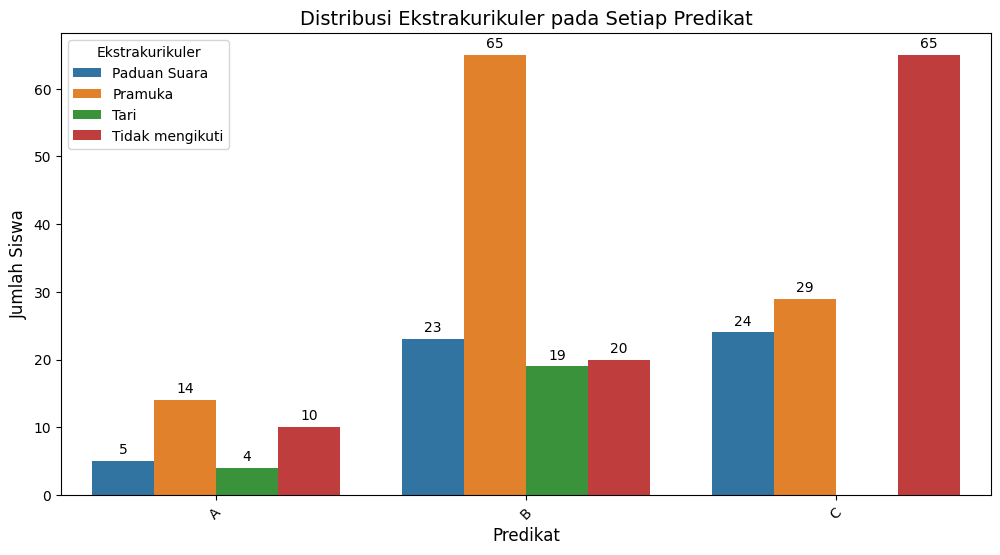

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Tabel jumlah ekstrakurikuler per mata pelajaran
ekstrakurikuler_per_mapel = df_student.groupby(["PREDIKAT", "EKSTRAKURIKULER"]).size().reset_index(name="Jumlah")

# Membuat bar chart
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=ekstrakurikuler_per_mapel, x="PREDIKAT", y="Jumlah", hue="EKSTRAKURIKULER")

# Menambahkan nilai jumlah data di atas setiap batang
for p in ax.containers:
    ax.bar_label(p, fmt='%d', label_type='edge', fontsize=10, padding=3, fontname="Arial")

# Menambahkan judul dan label dengan font Arial
plt.title("Distribusi Ekstrakurikuler pada Setiap Predikat", fontsize=14, fontname="Arial")
plt.xlabel("Predikat", fontsize=12, fontname="Arial")
plt.ylabel("Jumlah Siswa", fontsize=12, fontname="Arial")
plt.xticks(rotation=45, fontname="Arial")
plt.yticks(fontname="Arial")
plt.legend(title="Ekstrakurikuler", prop={'family': 'Arial'})

# Menampilkan grafik
plt.show()


### Distribusi predikat per mata pelajaran

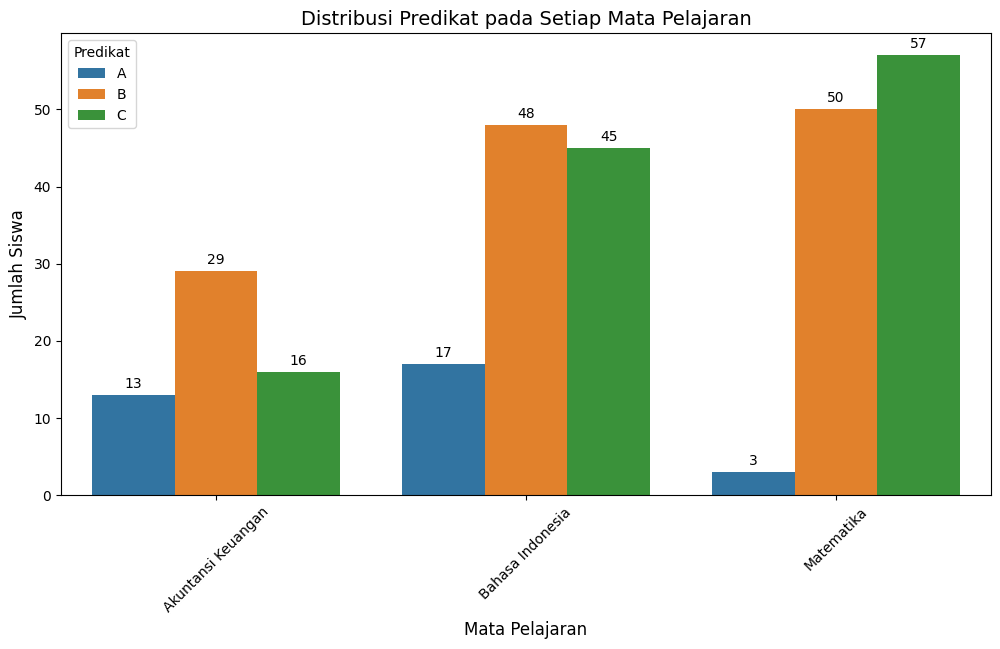

In [ ]:
# Tabel jumlah predikat per mata pelajaran
predikat_per_mapel = df_student.groupby(["Mata Pelajaran", "PREDIKAT"]).size().reset_index(name="Jumlah")

# Membuat bar chart
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=predikat_per_mapel, x="Mata Pelajaran", y="Jumlah", hue="PREDIKAT")

# Menambahkan nilai jumlah data di atas setiap batang
for p in ax.containers:
    ax.bar_label(p, fmt='%d', label_type='edge', fontsize=10, padding=3)

# Menambahkan judul dan label
plt.title("Distribusi Predikat pada Setiap Mata Pelajaran", fontsize=14)
plt.xlabel("Mata Pelajaran", fontsize=12)
plt.ylabel("Jumlah Siswa", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Predikat")

# Menampilkan grafik
plt.show()


## 👨‍💻 Feature Correlation

### Correlation Check Variable Number

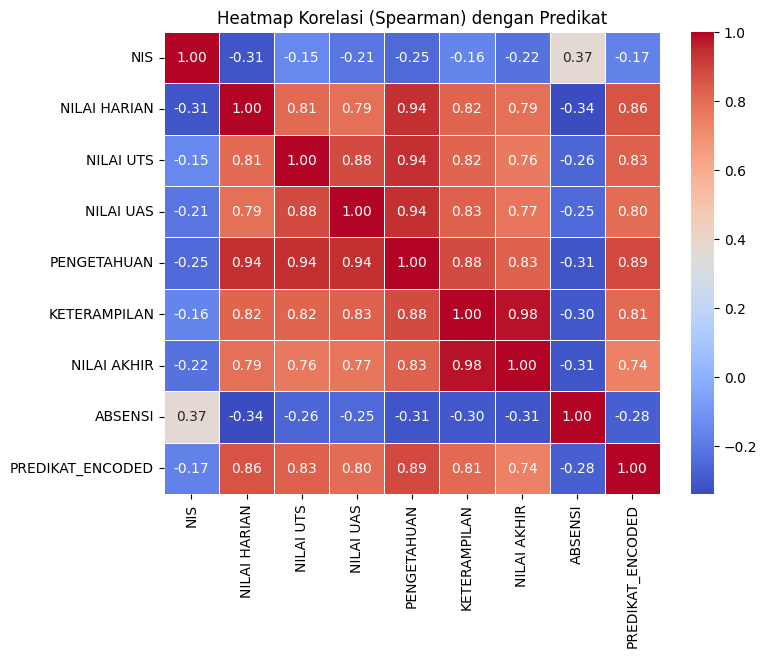

In [ ]:
df_korelasi = df_student.copy()

mapping = {'A': 3, 'B': 2, 'C': 1}
df_korelasi["PREDIKAT_ENCODED"] = df_korelasi["PREDIKAT"].map(mapping)

# kolom numerik
numerical_cols = df_korelasi.select_dtypes(include=['number']).columns

# korelasi Spearman
corr_mat = df_korelasi[numerical_cols].corr(method='pearson').round(2)

# Visualisasi Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_mat, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Heatmap Korelasi (Spearman) dengan Predikat")
plt.show()


### Check Relationship Categorical Variable

In [ ]:
!pip install researchpy

In [ ]:
contingency_table = pd.crosstab(df_student["EKSTRAKURIKULER"], df_student["PREDIKAT"])

# uji chi-square
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

# Tampilkan hasil
print(f"Chi-Square Score: {chi2:.4f}")
print(f"P-Value: {p:.4f}")


Chi-Square Score: 56.7621
P-Value: 0.0000


Cramer`s V digunakan untuk mengukur kekuatan hubungan antara variabel kategori. interpretasi kekuatan:

•	0,00 – 0,10: Hubungan sangat lemah atau tidak ada hubungan.

•	0,10 – 0,30: Hubungan lemah.

•	0,30 – 0,50: Hubungan sedang.

•	> 0,50: Hubungan kuat atau sempurna.






In [ ]:
import scipy.stats as ss

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    display(confusion_matrix)  # tabel kontingensi
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1) ** 2) / (n - 1)
    kcorr = k - ((k - 1) ** 2) / (n - 1)

    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

# Menghitung Cramér's V antara Ekstrakurikuler dan Predikat
cramers_v_score = cramers_v(df_student["EKSTRAKURIKULER"], df_student["PREDIKAT"])
print(f"Cramér's V antara Ekstrakurikuler dan Predikat: {cramers_v_score:.4f}")


PREDIKAT,A,B,C
EKSTRAKURIKULER,,,
Paduan Suara,5,23,24
Pramuka,14,65,29
Tari,4,19,0
Tidak mengikuti,10,20,65


Cramér's V antara Ekstrakurikuler dan Predikat: 0.3032


## 👨‍💻 Check Outlier

> revisi dengan menampilkan semua fitur untuk cek outlier



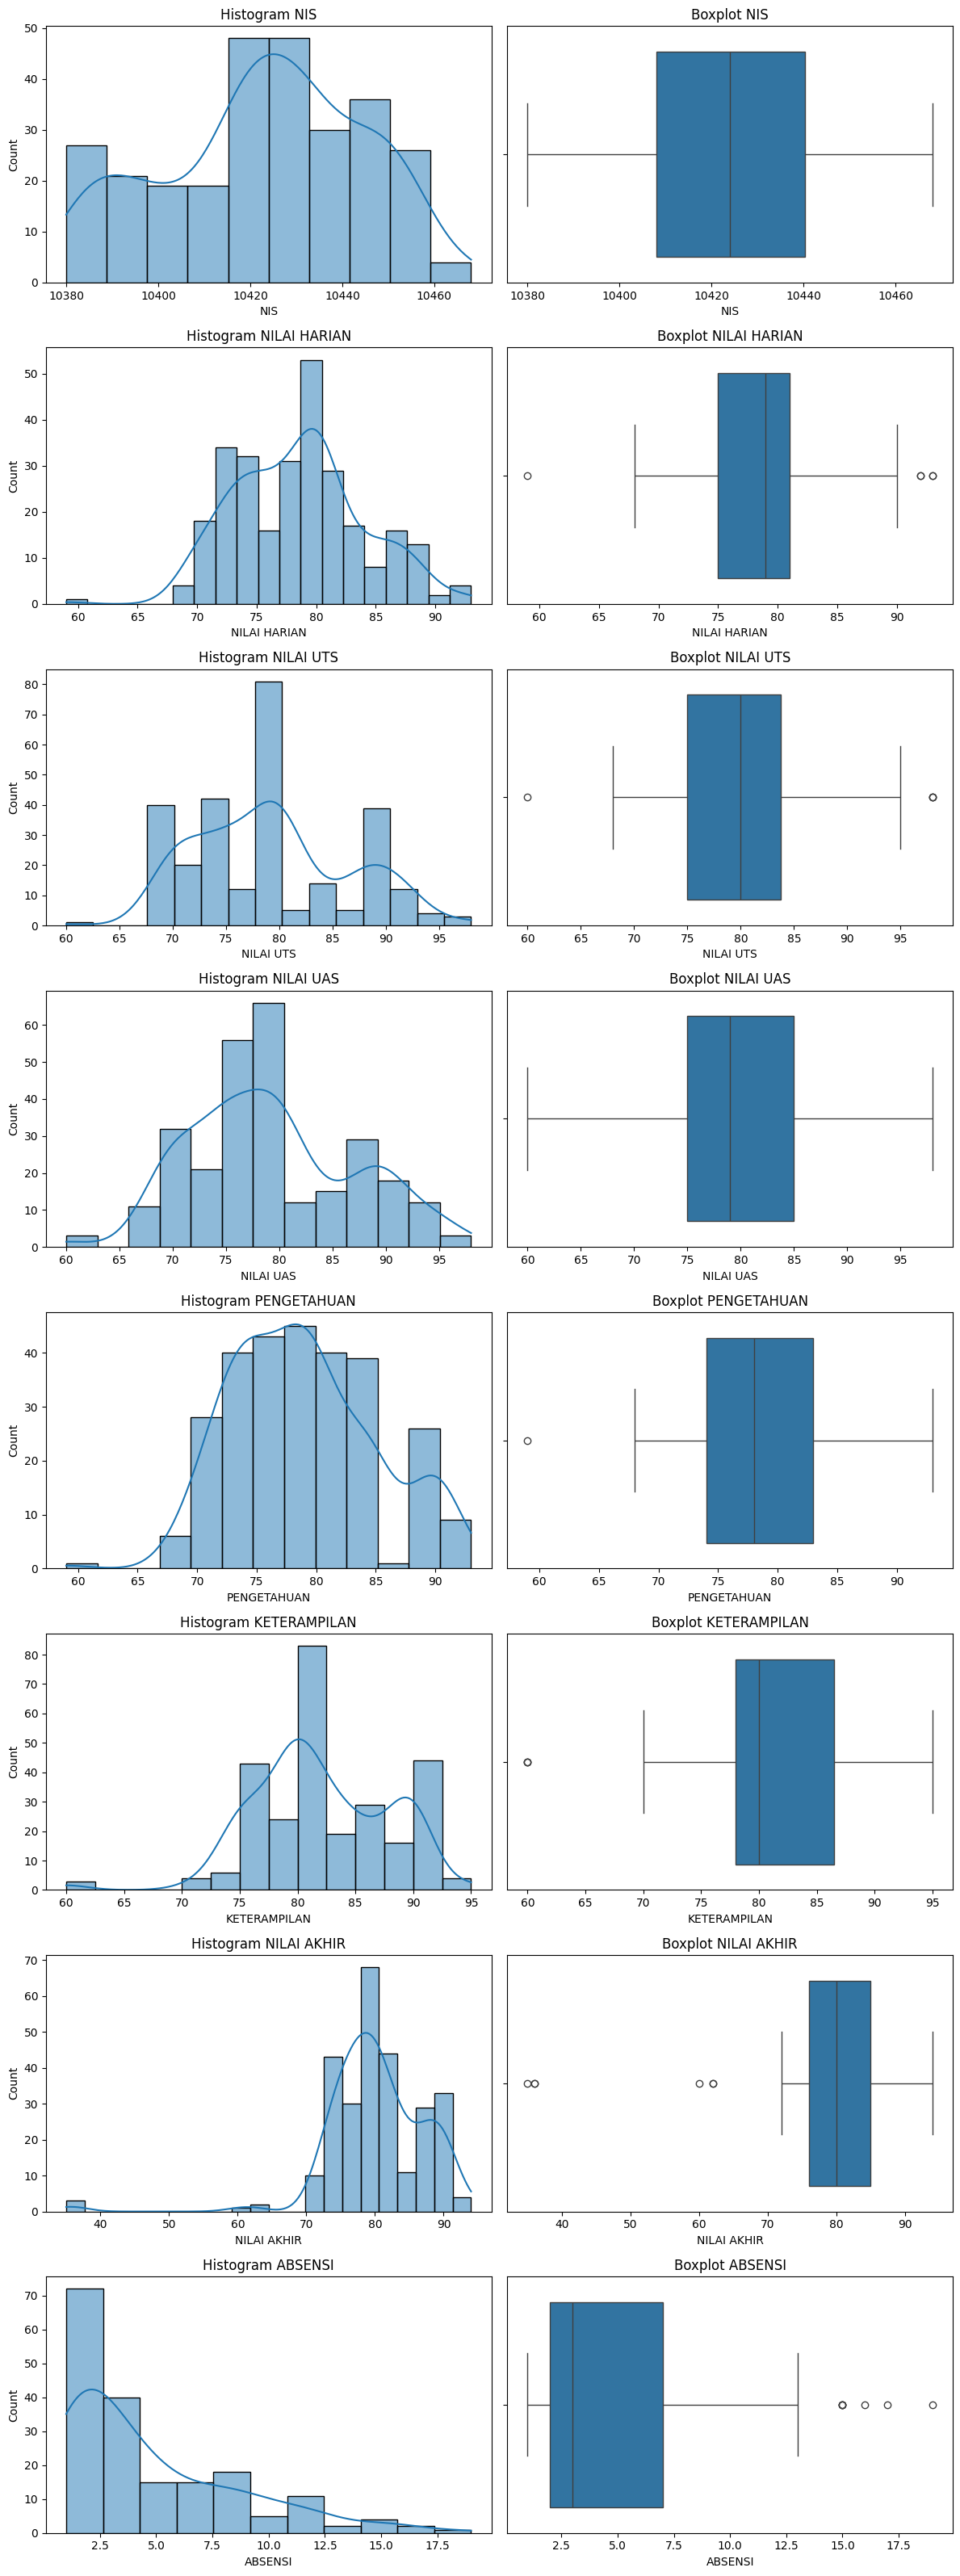

In [ ]:
# Pilih hanya kolom numerik
numerical_cols = df_student.select_dtypes(include=['number']).columns

# Menentukan ukuran figure
fig, axes = plt.subplots(nrows=len(numerical_cols), ncols=2, figsize=(12, 4 * len(numerical_cols)))

for i, col in enumerate(numerical_cols):
    # Histogram dengan KDE
    sns.histplot(data=df_student, x=col, kde=True, ax=axes[i, 0])
    axes[i, 0].set_title(f'Histogram {col}')

    # Boxplot
    sns.boxplot(x=df_student[col], ax=axes[i, 1])
    axes[i, 1].set_title(f'Boxplot {col}')

# Sesuaikan tata letak agar lebih rapi
plt.tight_layout()
plt.show()

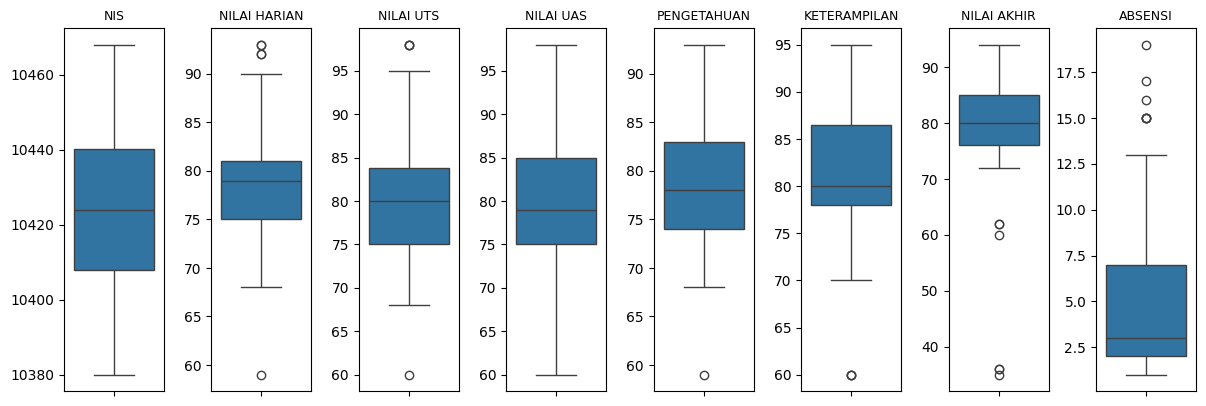

In [ ]:
# kolom numerik
numerical_cols = df_student.select_dtypes(include=['number']).columns

# Atur ukuran figure lebih kecil
fig, axes = plt.subplots(nrows=1, ncols=len(numerical_cols), figsize=(1.5 * len(numerical_cols), 4))

for i, col in enumerate(numerical_cols):
    sns.boxplot(y=df_student[col], ax=axes[i])
    axes[i].set_title(col, fontsize=9)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

# Sesuaikan tata letak agar lebih rapat
plt.tight_layout(pad=0.5)
plt.show()

# Pre-processing Data

## 👨‍💻 Feature Selection

In [ ]:
selected_columns = ["NILAI HARIAN", "NILAI UTS", "NILAI UAS", "KETERAMPILAN", "ABSENSI", "EKSTRAKURIKULER", "PREDIKAT"]

df_student = df_student[selected_columns]
df_student.head()

,NILAI HARIAN,NILAI UTS,NILAI UAS,KETERAMPILAN,ABSENSI,EKSTRAKURIKULER,PREDIKAT
0,86,90,94,90.0,5.0,Paduan Suara,A
1,72,72,72,72.0,2.0,Pramuka,C
2,83,88,87,90.0,9.0,Pramuka,B
3,90,90,90,90.0,1.0,Pramuka,A
4,79,88,89,90.0,NaN,Tidak mengikuti,B


In [ ]:
df_student.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278 entries, 0 to 277
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   NILAI HARIAN     278 non-null    int64  
 1   NILAI UTS        278 non-null    int64  
 2   NILAI UAS        278 non-null    int64  
 3   KETERAMPILAN     275 non-null    float64
 4   ABSENSI          185 non-null    float64
 5   EKSTRAKURIKULER  278 non-null    object 
 6   PREDIKAT         278 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 15.3+ KB


## 👨‍💻 Handle Missing Values


Mengisi missing value dengan pendekatan imputasi sederhana, mengisi nilai 0 pada kolom absen yang mengartikan bahwa tidak ada absensi

In [ ]:
df_student.isnull().sum()

,0
NILAI HARIAN,0
NILAI UTS,0
NILAI UAS,0
KETERAMPILAN,3
ABSENSI,93
EKSTRAKURIKULER,0
PREDIKAT,0


In [ ]:
# Mengisi missing value pada kolom Absensi dengan 0 yang menandakan tidak ada absensi
df_student['ABSENSI'] = df_student['ABSENSI'].fillna(0)

In [ ]:
# menghapus baris yang memiliki missing value pada kolom Keterampilan
df_student.dropna(subset=['KETERAMPILAN'], inplace=True)

In [ ]:
df_student.isnull().sum()

,0
NILAI HARIAN,0
NILAI UTS,0
NILAI UAS,0
KETERAMPILAN,0
ABSENSI,0
EKSTRAKURIKULER,0
PREDIKAT,0


In [ ]:
# Ubah Tipe Data
df_student["KETERAMPILAN"] = df_student["KETERAMPILAN"].astype(int)
df_student["ABSENSI"] = df_student["ABSENSI"].astype(int)

In [ ]:
df_student.info()

<class 'pandas.core.frame.DataFrame'>
Index: 275 entries, 0 to 277
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   NILAI HARIAN     275 non-null    int64 
 1   NILAI UTS        275 non-null    int64 
 2   NILAI UAS        275 non-null    int64 
 3   KETERAMPILAN     275 non-null    int64 
 4   ABSENSI          275 non-null    int64 
 5   EKSTRAKURIKULER  275 non-null    object
 6   PREDIKAT         275 non-null    object
dtypes: int64(5), object(2)
memory usage: 17.2+ KB


## 👨‍💻 Feature Encoding

In [ ]:
# **1. Ordinal Encoding untuk PREDIKAT**
predikat_order = [["C", "B", "A"]]
ordinal_encoder = OrdinalEncoder(categories=predikat_order)
df_student["PREDIKAT_ENCODED"] = ordinal_encoder.fit_transform(df_student[["PREDIKAT"]]).astype(int)

# **2. Label Encoding untuk EKSTRAKURIKULER**
ekstra_encoder = LabelEncoder()
df_student["EKSTRAKURIKULER_ENCODED"] = ekstra_encoder.fit_transform(df_student["EKSTRAKURIKULER"])

# **3. Simpan pemetaan kategori**
mappings = {
    "Ekstrakurikuler": dict(zip(ekstra_encoder.classes_, ekstra_encoder.transform(ekstra_encoder.classes_))),
    "Predikat": {k: v for v, k in enumerate(predikat_order[0])}
}

# **4. Hapus kolom asli**
df_student.drop(columns=["EKSTRAKURIKULER", "PREDIKAT"], inplace=True, errors="ignore")

# **5. Tampilkan pemetaan kategori**
for key, mapping in mappings.items():
    print(f"\nPemetaan {key}:")
    for k, v in mapping.items():
        print(f"  {k}: {v}")

df_student.head()



Pemetaan Ekstrakurikuler:
  Paduan Suara: 0
  Pramuka: 1
  Tari: 2
  Tidak mengikuti: 3

Pemetaan Predikat:
  C: 0
  B: 1
  A: 2


,NILAI HARIAN,NILAI UTS,NILAI UAS,KETERAMPILAN,ABSENSI,PREDIKAT_ENCODED,EKSTRAKURIKULER_ENCODED
0,86,90,94,90,5,2,0
1,72,72,72,72,2,0,1
2,83,88,87,90,9,1,1
3,90,90,90,90,1,2,1
4,79,88,89,90,0,1,3


In [ ]:
df_student.info()

<class 'pandas.core.frame.DataFrame'>
Index: 275 entries, 0 to 277
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   NILAI HARIAN             275 non-null    int64
 1   NILAI UTS                275 non-null    int64
 2   NILAI UAS                275 non-null    int64
 3   KETERAMPILAN             275 non-null    int64
 4   ABSENSI                  275 non-null    int64
 5   PREDIKAT_ENCODED         275 non-null    int64
 6   EKSTRAKURIKULER_ENCODED  275 non-null    int64
dtypes: int64(7)
memory usage: 17.2 KB


In [ ]:
df_student['PREDIKAT_ENCODED'].value_counts()

,count
PREDIKAT_ENCODED,
1,127
0,115
2,33


In [ ]:
df_student['EKSTRAKURIKULER_ENCODED'].value_counts()

,count
EKSTRAKURIKULER_ENCODED,
1,107
3,93
0,52
2,23


## 👨‍💻 Outlier Handling

In [ ]:
# Menggunakan skewness
skewness_values = df_student.select_dtypes(include=['number']).apply(stats.skew)

# Tampilkan hasil
print("Skewness untuk setiap fitur numerik:")
print(skewness_values)

Skewness untuk setiap fitur numerik:
NILAI HARIAN               0.183420
NILAI UTS                  0.367802
NILAI UAS                  0.307544
KETERAMPILAN              -0.298872
ABSENSI                    1.558432
PREDIKAT_ENCODED           0.432439
EKSTRAKURIKULER_ENCODED    0.127042
dtype: float64


In [ ]:
df_student['Absensi_Sqrt'] = np.sqrt(df_student['ABSENSI'])
df_student.drop(columns=["ABSENSI"], inplace=True)

# Cek kembali skewness
skewness_after = stats.skew(df_student['Absensi_Sqrt'])
print(f"Skewness setelah transformasi: {skewness_after}")

Skewness setelah transformasi: 0.3924719343903115


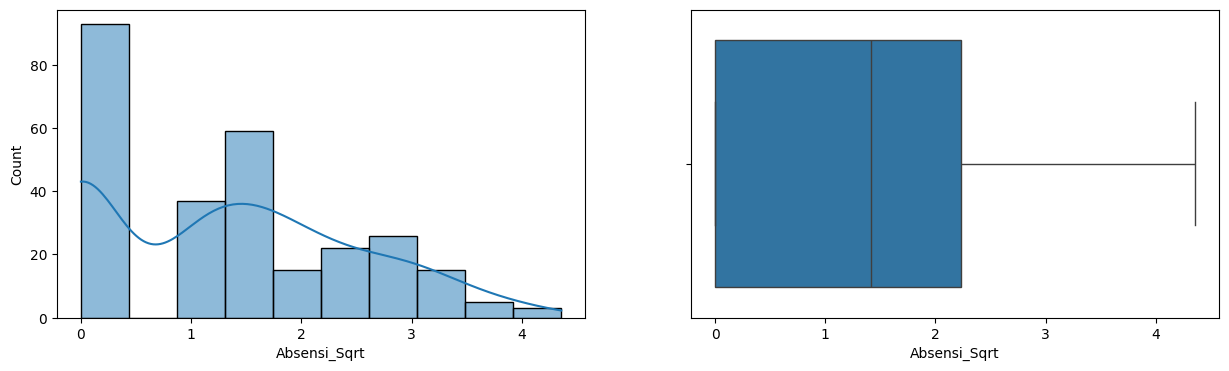

In [ ]:
fig = plt.figure(figsize=[15,4])
plt.subplot(1,2,1)
sns.histplot(data=df_student, x="Absensi_Sqrt",kde=True)

plt.subplot(1,2,2)
sns.boxplot(x='Absensi_Sqrt', data=df_student)
plt.show()

plt.show()

In [ ]:
df_student.head()

,NILAI HARIAN,NILAI UTS,NILAI UAS,KETERAMPILAN,PREDIKAT_ENCODED,EKSTRAKURIKULER_ENCODED,Absensi_Sqrt
0,86,90,94,90,2,0,2.236068
1,72,72,72,72,0,1,1.414214
2,83,88,87,90,1,1,3.000000
3,90,90,90,90,2,1,1.000000
4,79,88,89,90,1,3,0.000000


## 👨‍💻 Feature Scaling

In [ ]:
feature_scale = [col for col in df_student.columns if col not in ['PREDIKAT_ENCODED']]

# Inisialisasi scaler
scaler = StandardScaler()

# Fit dan transform hanya fitur numerik
scaled_features = scaler.fit_transform(df_student[feature_scale])

# Buat kembali DataFrame dengan data yang sudah di-scale dan mengubah PREDIKAT_ENCODED berada di paling kanan
df_scaled = pd.concat([
    pd.DataFrame(scaled_features, columns=feature_scale),
    df_student[['PREDIKAT_ENCODED']].reset_index(drop=True)
], axis=1)


# Cek hasil scaling
display(df_scaled.head())

df_scaled.to_excel("data_scale.xlsx", index=False)

,NILAI HARIAN,NILAI UTS,NILAI UAS,KETERAMPILAN,EKSTRAKURIKULER_ENCODED,Absensi_Sqrt,PREDIKAT_ENCODED
0,1.380373,1.490968,1.892154,1.395986,-1.378034,0.783368,2
1,-1.238866,-1.033935,-0.956908,-1.706901,-0.500813,0.078758,0
2,0.819108,1.210423,0.985634,1.395986,-0.500813,1.438319,1
3,2.128727,1.490968,1.374143,1.395986,-0.500813,-0.276365,2
4,0.070753,1.210423,1.244640,1.395986,1.253628,-1.133706,1


## 👨‍💻 Splitting Data

In [ ]:
X = df_scaled.drop('PREDIKAT_ENCODED', axis=1)
y = df_scaled['PREDIKAT_ENCODED']

# Split data 70% data train dan 30% data test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


## 👨‍💻 Handling Imbalance Data

In [ ]:
# oversampling SMOTE pada data training
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


# Menampilkan dimensi data setelah oversampling
print(f'X_train original shape: {X_train.shape}')
print(f'X_train after SMOTE oversampling shape: {X_train_resampled.shape}')
print(f'y_train original shape: {y_train.shape}')
print(f'y_train after SMOTE oversampling shape: {y_train_resampled.shape}')

X_train original shape: (192, 6)
X_train after SMOTE oversampling shape: (267, 6)
y_train original shape: (192,)
y_train after SMOTE oversampling shape: (267,)


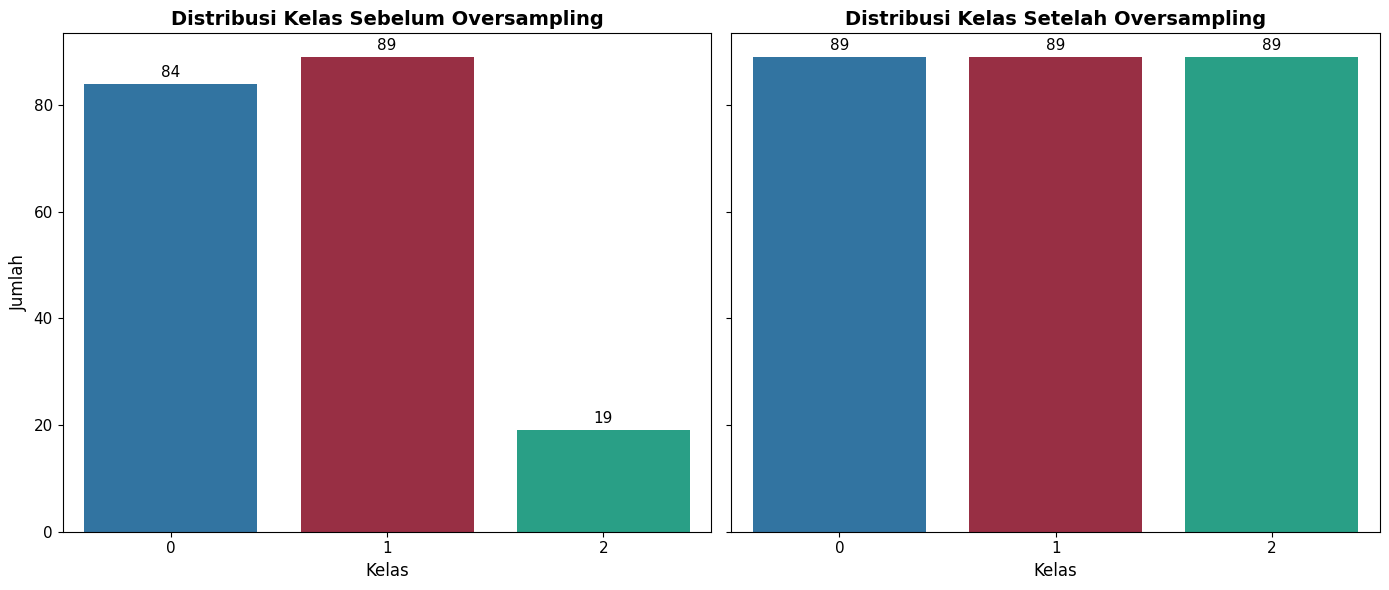

In [ ]:

# Data original
y_train_series = pd.Series(y_train)

# Data setelah oversampling
y_train_resampled_series = pd.Series(y_train_resampled)

original_counts = y_train_series.value_counts().sort_index()
resampled_counts = y_train_resampled_series.value_counts().sort_index()

# Warna untuk tiap grafik
colors = ['#1f77b4', '#A91D3A', '#15B392']

# Visualisasi
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6), sharey=True)

# Sebelum Oversampling
sns.barplot(x=original_counts.index, y=original_counts.values, ax=axes[0], palette=colors)
axes[0].set_title('Distribusi Kelas Sebelum Oversampling', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Kelas', fontsize=12)
axes[0].set_ylabel('Jumlah', fontsize=12)
axes[0].tick_params(axis='x', labelsize=11)
axes[0].tick_params(axis='y', labelsize=11)

# Menampilkan jumlah data di atas batang
for p in axes[0].containers:
    axes[0].bar_label(p, fmt='%d', label_type='edge', fontsize=11, padding=3)

# Setelah Oversampling
sns.barplot(x=resampled_counts.index, y=resampled_counts.values, ax=axes[1], palette=colors)
axes[1].set_title('Distribusi Kelas Setelah Oversampling', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Kelas', fontsize=12)
axes[1].set_ylabel('Jumlah', fontsize=12)
axes[1].tick_params(axis='x', labelsize=11)
axes[1].tick_params(axis='y', labelsize=11)

# Menampilkan jumlah data di atas batang
for p in axes[1].containers:
    axes[1].bar_label(p, fmt='%d', label_type='edge', fontsize=11, padding=3)

plt.tight_layout()
plt.show()

# Modeling

## 👨‍💻 Modelling SVM without tuning

In [ ]:
# Inisialisasi model SVM
Model = SVC(random_state=42,probability=True,decision_function_shape='ovr')

# Train Model
Model.fit(X_train_resampled, y_train_resampled)

# Predict
y_pred = Model.predict(X_test)

## 👨‍💻 Modelling with Hyperparameter Tuning

In [ ]:
parameters = {
    'kernel': ['linear','rbf', 'poly', 'sigmoid'],
    'C':[0.5, 1, 10, 100],
    'gamma':['scale', 'auto', 1, 0.1,  0.01, 0.001]
}

grid_search_model = GridSearchCV(estimator=SVC(random_state=42), param_grid=parameters, scoring='accuracy', verbose=1, cv=10, n_jobs=6)
grid_search_model.fit(X_train_resampled, y_train_resampled)

Fitting 10 folds for each of 96 candidates, totalling 960 fits


GridSearchCV(cv=10, estimator=SVC(random_state=42), n_jobs=6,
             param_grid={'C': [0.5, 1, 10, 100],
                         'gamma': ['scale', 'auto', 1, 0.1, 0.01, 0.001],
                         'kernel': ['linear', 'rbf', 'poly', 'sigmoid']},
             scoring='accuracy', verbose=1)

In [ ]:
print(f'Best Score: {grid_search_model.best_score_}')

best_parameters = grid_search_model.best_estimator_.get_params()
print(f'Best Parameter :')
for param in parameters:
  print(f'\t {param}: {best_parameters[param]}')

Best Score: 0.9740740740740741
Best Parameter :
	 kernel: linear
	 C: 100
	 gamma: scale


In [ ]:
y_pred_tuning = grid_search_model.predict(X_test)

# Evaluation

## 👨‍💻 Evaluation without tuning

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Melakukan prediksi pada data latih
y_train_pred = Model.predict(X_train_resampled)

# Menghitung metrik untuk data latih
train_accuracy = accuracy_score(y_train_resampled, y_train_pred)


# Menghitung metrik untuk data uji
test_accuracy = accuracy_score(y_test, y_pred)


# Menampilkan hasil
print("Kinerja Model pada Data Latih:")
print(f"Akurasi: {train_accuracy:.4f}")

print("Kinerja Model pada Data Uji:")
print(f"Akurasi: {test_accuracy:.4f}")


Kinerja Model pada Data Latih:
Akurasi: 0.9700
Kinerja Model pada Data Uji:
Akurasi: 0.9398


In [ ]:
# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {accuracy:.4f}")

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94        31
           1       0.97      0.89      0.93        38
           2       0.93      1.00      0.97        14

    accuracy                           0.94        83
   macro avg       0.94      0.95      0.94        83
weighted avg       0.94      0.94      0.94        83

Accuracy Score: 0.9398


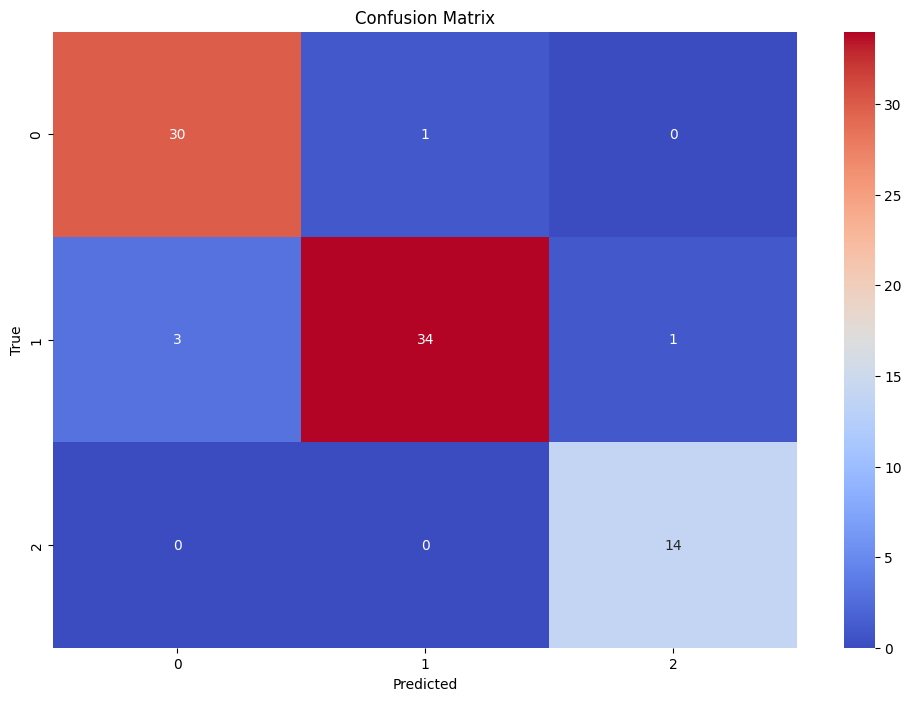

In [ ]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

class_labels = sorted(y_train.unique())

# Visualisasi confusion matrix
plt.figure(figsize=(12, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='coolwarm', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

## 👨‍💻 Evaluation with tuning

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Melatih model dengan data latih
grid_search_model.fit(X_train_resampled, y_train_resampled)

# Melakukan prediksi pada data latih
y_train_pred = grid_search_model.predict(X_train_resampled)


# Menghitung metrik untuk data latih
train_accuracy = accuracy_score(y_train_resampled, y_train_pred)

# Menghitung metrik untuk data uji
test_accuracy = accuracy_score(y_test, y_pred_tuning)


# Menampilkan hasil
print("Kinerja Model pada Data Latih:")
print(f"Akurasi: {train_accuracy:.4f}")


print("Kinerja Model pada Data Uji:")
print(f"Akurasi: {test_accuracy:.4f}")

Fitting 10 folds for each of 96 candidates, totalling 960 fits
Kinerja Model pada Data Latih:
Akurasi: 0.9850
Kinerja Model pada Data Uji:
Akurasi: 0.9518


In [ ]:
print(classification_report(y_test, y_pred_tuning))

# Accuracy score
accuracy = accuracy_score(y_test, y_pred_tuning)
print(f"Accuracy Score: {accuracy:.4f}")

              precision    recall  f1-score   support

           0       0.97      1.00      0.98        31
           1       0.97      0.92      0.95        38
           2       0.87      0.93      0.90        14

    accuracy                           0.95        83
   macro avg       0.94      0.95      0.94        83
weighted avg       0.95      0.95      0.95        83

Accuracy Score: 0.9518


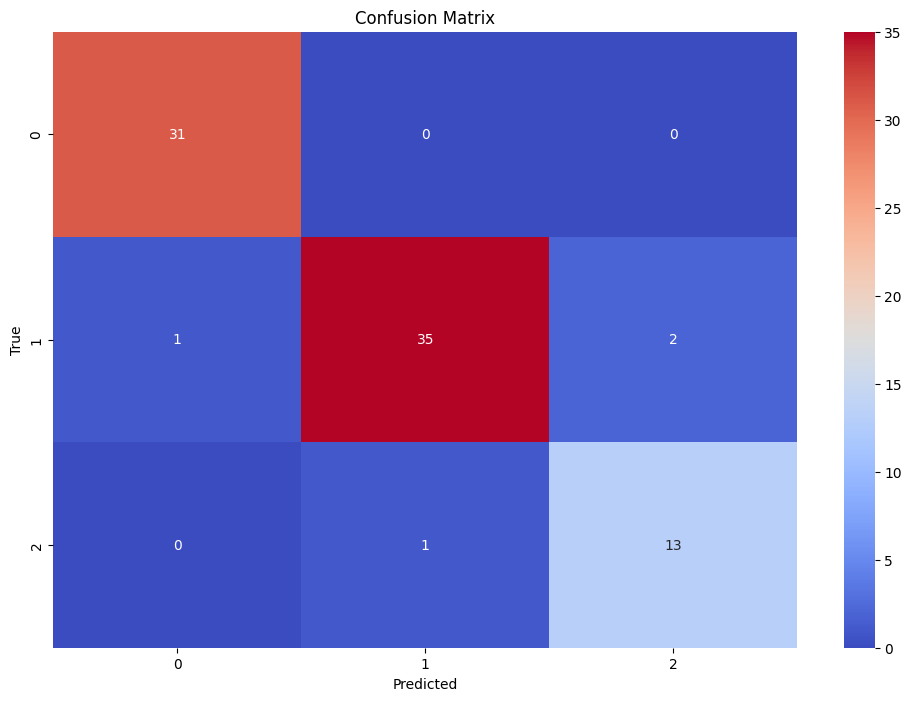

In [ ]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_tuning)

class_labels = sorted(y_train.unique())

# Visualisasi confusion matrix
plt.figure(figsize=(12, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='coolwarm', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

## 👨‍💻 Visualiasi perbandingan hasil evaluasi

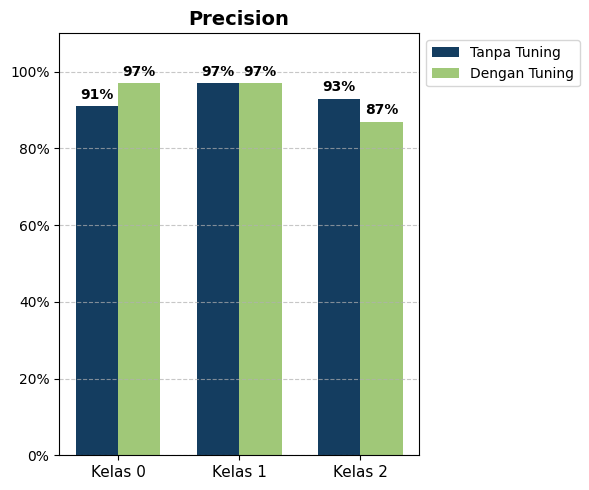

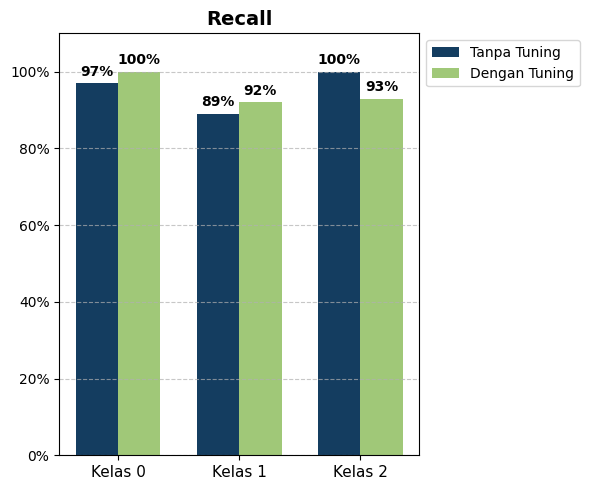

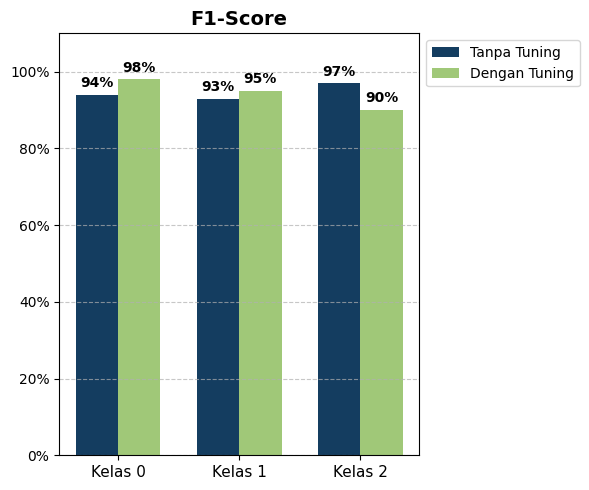

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Data
precision_tanpa_tuning = [91, 97, 93]
precision_dengan_tuning = [97, 97, 87]

recall_tanpa_tuning = [97, 89, 100]
recall_dengan_tuning = [100, 92, 93]

f1_score_tanpa_tuning = [94, 93, 97]
f1_score_dengan_tuning = [98, 95, 90]

# Label kelas
kelas = ['Kelas 0', 'Kelas 1', 'Kelas 2']

# Lebar bar
bar_width = 0.35
x = np.arange(len(kelas))  # Posisi bar

# Warna untuk masing-masing kategori
warna_tanpa_tuning = '#143D60'
warna_dengan_tuning = '#A0C878'

# Fungsi untuk menampilkan angka sebagai persentase
def percent_formatter(x, pos):
    return f"{int(x)}%"

# Daftar metrik dan data
metrics = ['Precision', 'Recall', 'F1-Score']
data_tanpa_tuning = [precision_tanpa_tuning, recall_tanpa_tuning, f1_score_tanpa_tuning]
data_dengan_tuning = [precision_dengan_tuning, recall_dengan_tuning, f1_score_dengan_tuning]

# Loop untuk membuat chart terpisah
for i in range(3):
    fig, ax = plt.subplots(figsize=(6, 5))

    bars1 = ax.bar(x - bar_width / 2, data_tanpa_tuning[i], bar_width, label='Tanpa Tuning', color=warna_tanpa_tuning)
    bars2 = ax.bar(x + bar_width / 2, data_dengan_tuning[i], bar_width, label='Dengan Tuning', color=warna_dengan_tuning)

    ax.set_xticks(x)
    ax.set_xticklabels(kelas, fontsize=11)
    ax.set_title(metrics[i], fontsize=14, fontweight='bold')
    ax.set_ylim(0, 110)
    ax.grid(axis='y', linestyle='--', alpha=0.7)

    ax.yaxis.set_major_formatter(FuncFormatter(percent_formatter))

    # Menambahkan nilai di atas batang
    for bar in bars1:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height + 2, f"{height}%", ha='center', fontsize=10, fontweight='bold')

    for bar in bars2:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height + 2, f"{height}%", ha='center', fontsize=10, fontweight='bold')

    # Menambahkan legenda di luar plot untuk menghindari tumpang tindih
    ax.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=10)

    plt.tight_layout()

    # Simpan setiap gambar sebagai file terpisah
    plt.savefig(f"{metrics[i]}.png", dpi=300, bbox_inches='tight')

    plt.show()


In [ ]:
# Pastikan y_test dan y_pred dalam bentuk array 2D sebelum inverse_transform
y_test_reshaped = np.array(y_test).reshape(-1, 1)
y_pred_reshaped = np.array(y_pred_tuning).reshape(-1, 1)

# Membandingkan data asli dan data prediksi
comparison_df = X_test.copy()
comparison_df['Actual'] = ordinal_encoder.inverse_transform(y_test_reshaped).flatten()
comparison_df['Predicted'] = ordinal_encoder.inverse_transform(y_pred_reshaped).flatten()

# Tampilkan hasil perbandingan
display(comparison_df)

comparison_df.to_excel("comparison_df.xlsx", index=False)

,NILAI HARIAN,NILAI UTS,NILAI UAS,KETERAMPILAN,EKSTRAKURIKULER_ENCODED,Absensi_Sqrt,Actual,Predicted
30,-1.238866,-1.033935,-0.956908,-0.327840,-0.500813,-0.276365,C,C
139,-0.677601,-0.613118,-0.568400,-0.327840,-0.500813,-1.133706,C,C
195,-1.425955,-0.613118,-0.568400,-1.362136,1.253628,1.291222,C,C
126,0.819108,0.088244,-0.568400,0.189307,-0.500813,-1.133706,B,B
215,1.193285,2.613148,2.021657,1.395986,1.253628,-0.276365,A,A
...,...,...,...,...,...,...,...,...
82,0.257842,0.088244,-1.215914,0.016925,-0.500813,-0.276365,B,B
112,0.819108,0.088244,-1.215914,0.189307,0.376408,0.078758,B,B
55,2.689993,1.490968,1.633149,2.257899,-1.378034,-0.276365,A,A
152,0.257842,-0.613118,-0.568400,0.189307,-1.378034,0.783368,B,B
